## Part I. Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,Feb
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,Feb
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,Feb
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,Feb
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,Feb


## High Level Check
- no null values
- 4 non-numerical columns: Month, VisitorType (string), Weekend, Revenue (boolean)

In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [7]:
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
df["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [9]:
# only 15% bought 
df["Revenue"].mean()

0.15474452554744525

## Visualize - for selecting variables to do segmentation

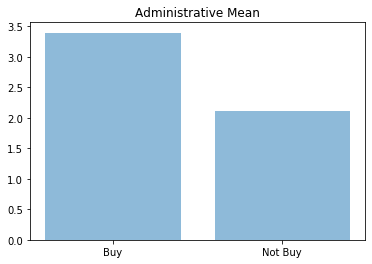

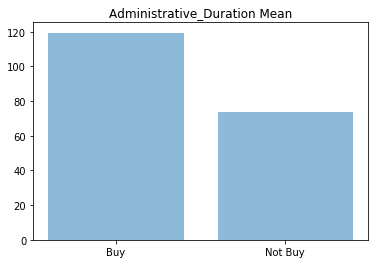

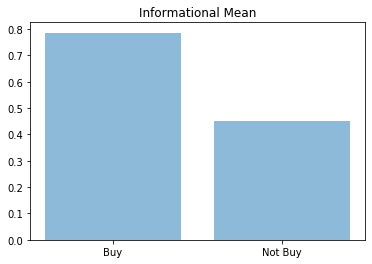

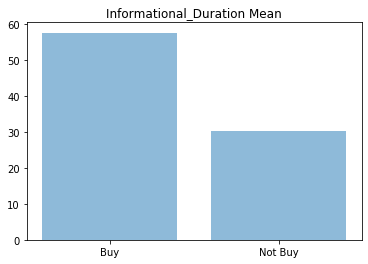

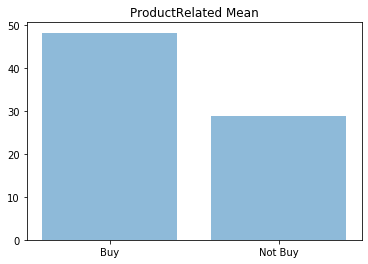

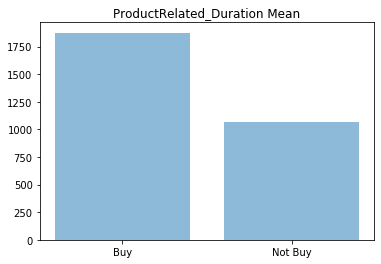

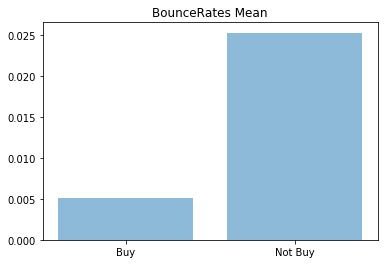

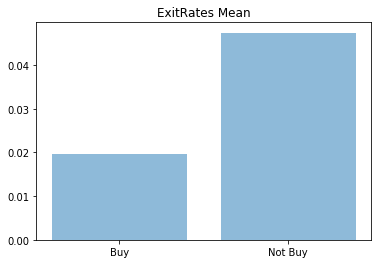

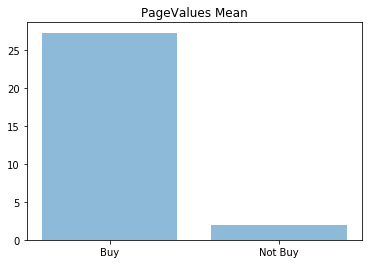

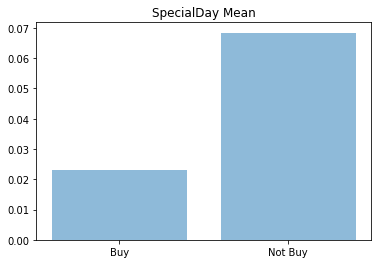

In [10]:
# get numeric columns
nu_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

buy_idx = (df["Revenue"]==True)

for col in nu_cols:
    x = ["Buy", "Not Buy"]
    y = [df.loc[buy_idx, col].mean(), df.loc[~buy_idx, col].mean()]
    plt.bar(x, y, align='center', alpha=0.5)
    plt.title(col + ' Mean')
    plt.show()

After checking categorical plots, I excluded the following variables
1. region - no significant difference
2. weekend - no significant difference 
3. month - not meaningful for clustering

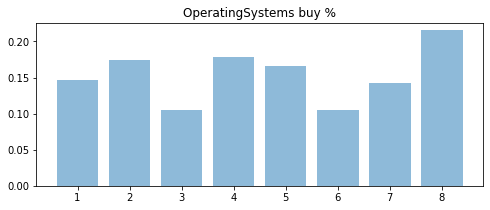

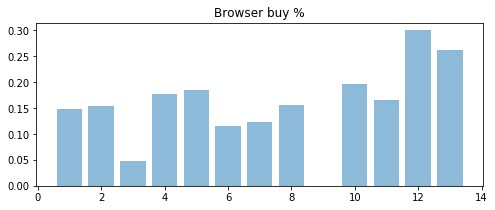

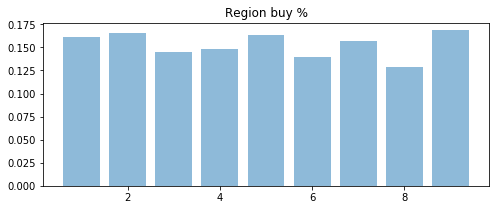

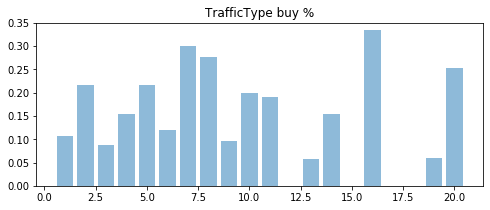

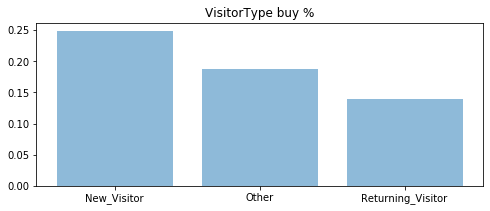

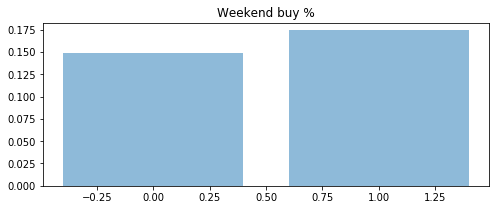

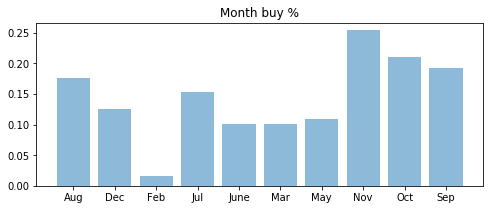

In [11]:
cat_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Month']

for col in cat_cols:
    
    tmp = df.groupby(by=col)["Revenue"].mean()
    x = tmp.index.values
    y = tmp.values
    plt.figure(figsize=(8,3))
    plt.bar(x, y, align='center', alpha=0.5)
    plt.title(col + ' buy %')
    plt.show()

## Note
### Goal: clustering with Kmeans and see which clusters to target
### Issue 1: how to deal with the mix of numerical and categorical
1. only numerical data with Kmeans
2. only categorical data with Kmodes
3. one-hot-encoding on categorical data and run Kmeans

reference of cluster algorithms: https://scikit-learn.org/stable/modules/clustering.html

## Preprocess

In [12]:
cat_cols_using = ['OperatingSystems', 'Browser', 'TrafficType', 'VisitorType']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

In [14]:
# get numeric features standardized
scaler = StandardScaler()
df_nu = pd.DataFrame(scaler.fit_transform(df[nu_cols].values), columns=nu_cols)

# get categorical features one-hot-encoded
enc = OneHotEncoder(handle_unknown='ignore')
df_cat = pd.DataFrame(enc.fit_transform(df[cat_cols_using].values).todense(), #the output was a sparse matrix, so need todense
                      columns =enc.get_feature_names(cat_cols_using))

# merger two sets of features
X = df_nu.merge(df_cat, left_index=True, right_index=True)

## Check input

In [15]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
X.shape

(12330, 54)

## Kmeans

In [17]:
from sklearn.cluster import KMeans

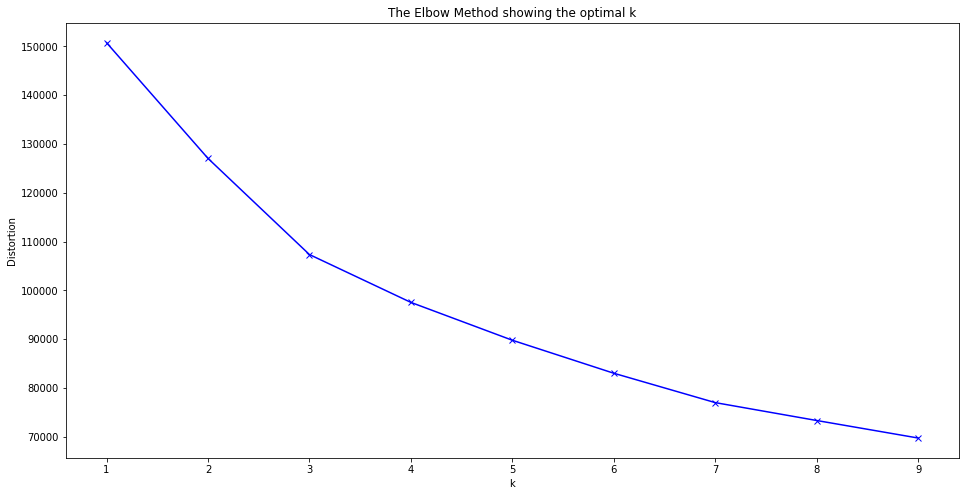

CPU times: user 11.2 s, sys: 1.42 s, total: 12.6 s
Wall time: 3.66 s


In [18]:
%%time

# fit model for each K
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# print the elbow
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Try 3 clusters

In [19]:
kmeanModel = KMeans(n_clusters=3,random_state=8)
kmeanModel.fit(X)

tmpX = X.copy()
tmpX["Cluster"] = kmeanModel.labels_
tmpX["Revenue"] = df["Revenue"].copy()

In [20]:
tmpX["Cluster"].value_counts()

2    9649
1    1631
0    1050
Name: Cluster, dtype: int64

#### What is the purchase rate among each cluster?

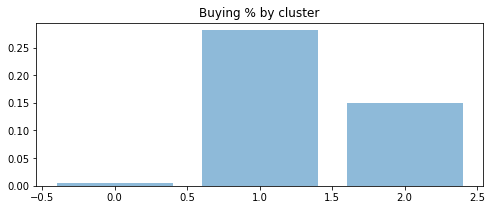

In [21]:
tmp = tmpX.groupby(by='Cluster')["Revenue"].mean()
x = tmp.index.values
y = tmp.values
plt.figure(figsize=(8,3))
plt.bar(x, y, align='center', alpha=0.5)
plt.title('Buying % by cluster')
plt.show()

#### Numeric features comparison by cluster - notice the values here haven't been reversed back

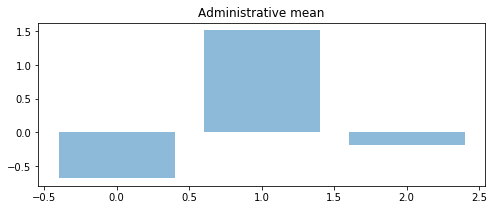

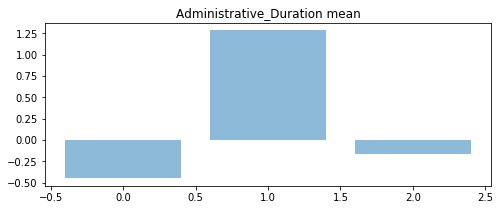

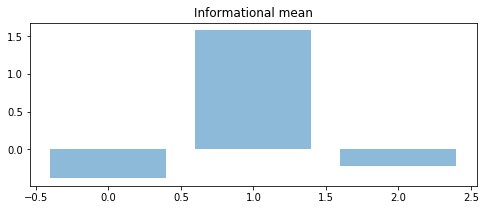

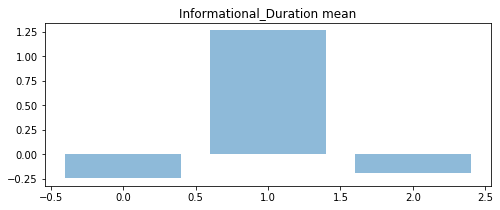

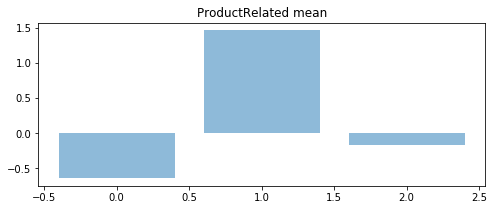

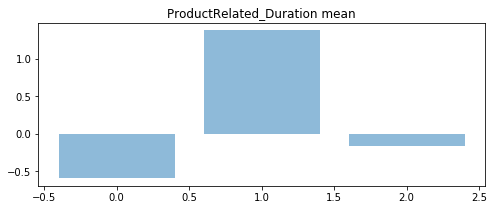

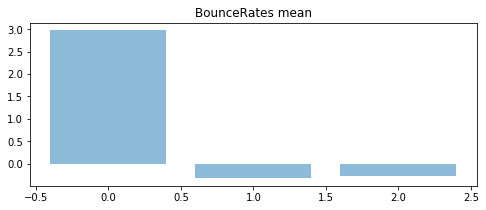

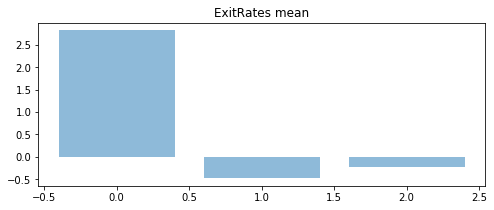

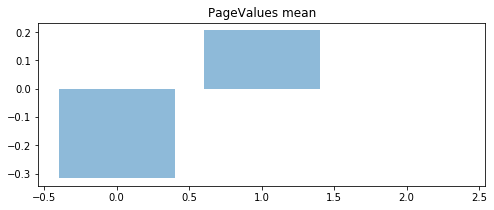

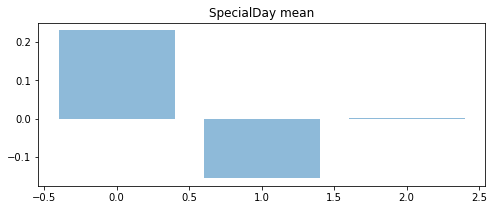

In [22]:
for col in nu_cols:
    tmp = tmpX.groupby(by="Cluster")[col].mean()
    x = tmp.index.values
    y = tmp.values
    plt.figure(figsize=(8,3))
    plt.bar(x, y, align='center', alpha=0.5)
    plt.title(col + ' mean')
    plt.show()

#### Categorical featues comparison by cluster

In [23]:
import seaborn as sns

In [24]:
for col in cat_cols_using:
    print("=========" + col + ' cluster count' + "=========")
    print(pd.crosstab(df[col], tmpX["Cluster"], normalize='columns'))

=========OperatingSystems cluster count=========
Cluster                  0         1         2
OperatingSystems                              
1                 0.263810  0.176579  0.209348
2                 0.387619  0.580625  0.543787
3                 0.314286  0.204169  0.196082
4                 0.018095  0.034948  0.041662
5                 0.000000  0.000000  0.000622
6                 0.002857  0.001226  0.001451
7                 0.000952  0.000613  0.000518
8                 0.012381  0.001839  0.006529
=========Browser cluster count=========
Cluster         0         1         2
Browser                              
1        0.246667  0.167382  0.200021
2        0.600952  0.716125  0.638615
3        0.019048  0.003679  0.008187
4        0.051429  0.044758  0.063115
5        0.034286  0.032495  0.039175
6        0.008571  0.012876  0.014924
7        0.003810  0.003679  0.004042
8        0.015238  0.001839  0.012022
9        0.000000  0.000000  0.000104
10       0.008571  0.01

## Part 2. Logistic Regression
- logistic: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [26]:
# assign True to 1, False to 0
y = df["Revenue"].map(lambda x: int(x)) 

# split to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

**Logistic Regression** including all the variables

In [27]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print("train accuracy: " , clf.score(X_train, y_train))
print("test accuracy: " , clf.score(X_test, y_test))

train accuracy:  0.8822847873942764
test accuracy:  0.8853744255204109


/Users/lilyforreal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
confusion_matrix(y_test, clf.predict(X_test))

array([[3067,   58],
       [ 366,  208]])

**Logistic Regression with liblinear solver - results are the same** 

In [29]:
clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
print("train accuracy: " , clf.score(X_train, y_train))
print("test accuracy: " , clf.score(X_test, y_test))

train accuracy:  0.8825165102537366
test accuracy:  0.8853744255204109


In [30]:
confusion_matrix(y_test, clf.predict(X_test))

array([[3067,   58],
       [ 366,  208]])

**Logistic Regression with class weight**

In [31]:
clf_w = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
print("train accuracy: " , clf_w.score(X_train, y_train))
print("test accuracy: " , clf_w.score(X_test, y_test))

train accuracy:  0.867570385818561
test accuracy:  0.8769937821032712


/Users/lilyforreal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
confusion_matrix(y_test, clf_w.predict(X_test))

array([[2794,  331],
       [ 124,  450]])

**Logistic Regression - regularization - no difference**

In [33]:
clf_r = LogisticRegression(random_state=0, penalty='elasticnet', 
                           solver='saga', l1_ratio = 0.1).fit(X_train, y_train)
print("train accuracy: " , clf_r.score(X_train, y_train))
print("test accuracy: " , clf_r.score(X_test, y_test))

train accuracy:  0.8822847873942764
test accuracy:  0.8853744255204109


/Users/lilyforreal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


**Logistic Regression with clusters**

In [34]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
# add cluster
X2 = X.copy()
X2["Cluster"] = kmeanModel.labels_

# assign True to 1, False to 0
y = df["Revenue"].map(lambda x: int(x)) 

# split to train and test 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=33)

In [36]:
clf_c = LogisticRegression(random_state=0).fit(X_train, y_train)
print("train accuracy: " , clf_c.score(X_train, y_train))
print("test accuracy: " , clf_c.score(X_test, y_test))

train accuracy:  0.8822847873942764
test accuracy:  0.8851040821843742


/Users/lilyforreal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Part 3. Random Forest
RF: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(random_state=0, max_depth=13, min_samples_leaf=3).fit(X_train, y_train)
print("train accuracy: " , rf.score(X_train, y_train))
print("test accuracy: " , rf.score(X_test, y_test))

train accuracy:  0.9365079365079365
test accuracy:  0.8978102189781022


In [39]:
confusion_matrix(y_test, rf.predict(X_test))

array([[3058,   67],
       [ 311,  263]])

In [40]:
pd.Series(rf.feature_importances_, index=X_train.columns.values).sort_values(ascending=False)

PageValues                       5.129663e-01
ExitRates                        7.741176e-02
ProductRelated_Duration          7.144429e-02
ProductRelated                   5.851554e-02
BounceRates                      5.611051e-02
Administrative_Duration          4.700012e-02
Administrative                   3.736666e-02
Informational_Duration           2.361004e-02
Informational                    1.302622e-02
TrafficType_2                    1.017015e-02
VisitorType_Returning_Visitor    9.974591e-03
Cluster                          8.470214e-03
VisitorType_New_Visitor          7.937219e-03
OperatingSystems_3               5.787444e-03
OperatingSystems_2               5.703421e-03
SpecialDay                       5.653645e-03
Browser_2                        5.353199e-03
TrafficType_3                    4.708453e-03
TrafficType_1                    4.490817e-03
OperatingSystems_1               4.179789e-03
Browser_1                        3.815139e-03
TrafficType_8                    3